In [1]:
pip install xlrd


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import gzip
import io

# Dosya yolunu belirtin
file_path = r'C:\Users\emrea\OneDrive\Masaüstü\GSE118038_miRNA_count_normalized_counts_DESeq2_all_samples (2).xls.gz'

# GZIP dosyasını açın ve içeriğini okuyun
with gzip.open(file_path, 'rb') as f:
    file_content = io.BytesIO(f.read())

# Excel dosyasını BytesIO nesnesinden yükleyin
data = pd.read_excel(file_content)

# Sütun adlarını ve ilk birkaç satırı görüntüleyin
print(data.columns)
print(data.head())


Index(['miRNA', 'P35', 'P88', 'P129', 'P167', 'P190', 'P276', 'P303', 'P337',
       'P385', 'P391', 'P444', 'P449', 'P452', 'P465', 'P489', 'P491', 'P504',
       'P507', 'P517', 'P520', 'P524', 'P531', 'P536', 'P540', 'P546', 'P551',
       'P554', 'P587', 'P597', 'P606', 'P627', 'P638', 'P676', 'P680', 'P694',
       'P727', 'P737', 'A158', 'A189', 'A223', 'A233', 'A254', 'A308', 'A319',
       'A336', 'A346', 'A350', 'A426', 'A512', 'A534', 'A557', 'A607', 'A618',
       'A640', 'A642', 'A649', 'A655', 'A686', 'A695', 'A700', 'A717', 'A721',
       'A724', 'A734', 'A747', 'A755', 'A758', 'A766', 'A781', 'A790'],
      dtype='object')
             miRNA        P35       P88      P129      P167      P190  \
0     hsa-miR-3936   0.000000  0.000000  0.000000  0.000000  0.000000   
1  hsa-miR-6812-5p   0.000000  0.000000  0.000000  0.000000  0.000000   
2  hsa-miR-4687-5p   0.000000  0.376483  0.791901  0.000000  1.594083   
3  hsa-miR-6864-3p   0.000000  0.000000  0.000000  0.000000  0

Index(['miRNA', 'P35', 'P88', 'P129', 'P167', 'P190', 'P276', 'P303', 'P337',
       'P385', 'P391', 'P444', 'P449', 'P452', 'P465', 'P489', 'P491', 'P504',
       'P507', 'P517', 'P520', 'P524', 'P531', 'P536', 'P540', 'P546', 'P551',
       'P554', 'P587', 'P597', 'P606', 'P627', 'P638', 'P676', 'P680', 'P694',
       'P727', 'P737', 'A158', 'A189', 'A223', 'A233', 'A254', 'A308', 'A319',
       'A336', 'A346', 'A350', 'A426', 'A512', 'A534', 'A557', 'A607', 'A618',
       'A640', 'A642', 'A649', 'A655', 'A686', 'A695', 'A700', 'A717', 'A721',
       'A724', 'A734', 'A747', 'A755', 'A758', 'A766', 'A781', 'A790'],
      dtype='object')
             miRNA        P35       P88      P129      P167      P190  \
0     hsa-miR-3936   0.000000  0.000000  0.000000  0.000000  0.000000   
1  hsa-miR-6812-5p   0.000000  0.000000  0.000000  0.000000  0.000000   
2  hsa-miR-4687-5p   0.000000  0.376483  0.791901  0.000000  1.594083   
3  hsa-miR-6864-3p   0.000000  0.000000  0.000000  0.000000  0

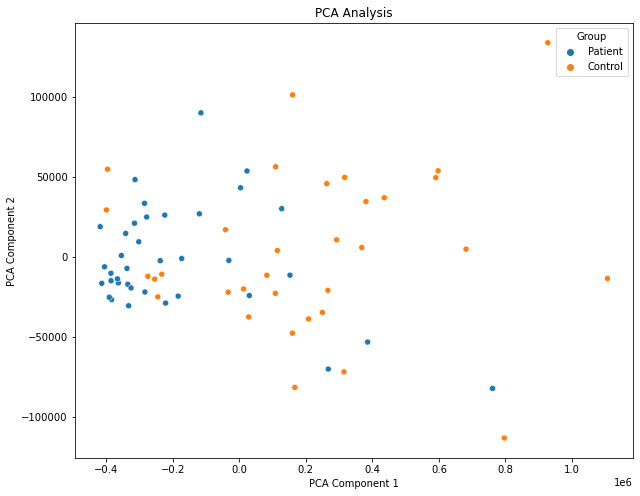

In [8]:
import pandas as pd
import gzip
import io
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Dosya yolunu belirtin
file_path = r'C:\\Users\\MasterYtu\\Desktop\\GSE118038_miRNA_count_normalized_counts_DESeq2_all_samples.xls.gz'

# GZIP dosyasını açın ve içeriğini okuyun
with gzip.open(file_path, 'rb') as f:
    file_content = io.BytesIO(f.read())

# Excel dosyasını BytesIO nesnesinden yükleyin
data = pd.read_excel(file_content)

# Sütun adlarını ve ilk birkaç satırı görüntüleyin
print(data.columns)
print(data.head())

# P ve A sütunlarını seçin
p_columns = [col for col in data.columns if col.startswith('P')]
a_columns = [col for col in data.columns if col.startswith('A')]

# PCA, t-SNE ve UMAP Analizi için P ve A sütunlarını seçin
features = data[p_columns + a_columns]

# Hasta ve kontrol gruplarını etiketleyin
groups = ['Patient'] * len(p_columns) + ['Control'] * len(a_columns)

# PCA Analizi
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features.T)  # Transpoze ederek sütunları örnek olarak kullanıyoruz
data_pca = pd.DataFrame(pca_result, columns=['pca1', 'pca2'])
data_pca['group'] = groups

# PCA Sonuçlarını Görselleştirme
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca1', y='pca2', hue='group', data=data_pca)
plt.title('PCA Analysis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Group')
plt.show()



C:\Users\MasterYtu\anaconda3\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


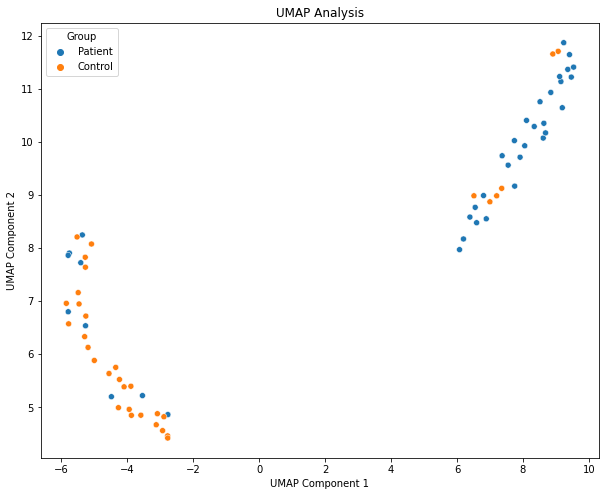

In [9]:
# UMAP Analizi
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(features.T)  # Transpoze ederek sütunları örnek olarak kullanıyoruz
data_umap = pd.DataFrame(umap_result, columns=['umap1', 'umap2'])
data_umap['group'] = groups

# UMAP Sonuçlarını Görselleştirme
plt.figure(figsize=(10, 8))
sns.scatterplot(x='umap1', y='umap2', hue='group', data=data_umap)
plt.title('UMAP Analysis')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Group')
plt.show()


C:\Users\MasterYtu\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\MasterYtu\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


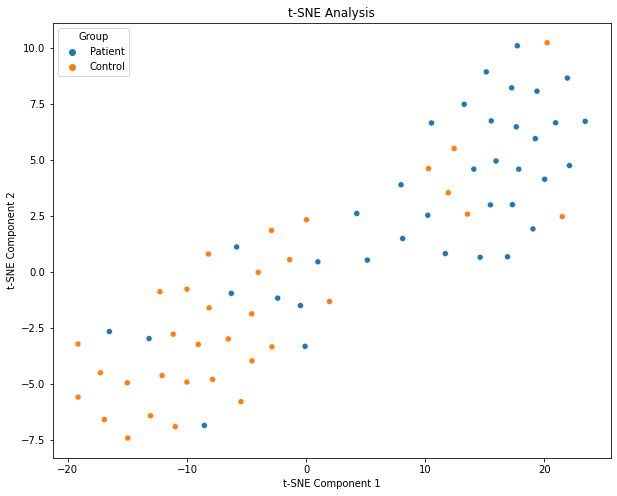

In [10]:
# t-SNE Analizi
tsne = TSNE(n_components=2, random_state=42, n_iter=1000, perplexity=30)
tsne_result = tsne.fit_transform(features.T)  # Transpoze ederek sütunları örnek olarak kullanıyoruz
data_tsne = pd.DataFrame(tsne_result, columns=['tsne1', 'tsne2'])
data_tsne['group'] = groups

# t-SNE Sonuçlarını Görselleştirme
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne1', y='tsne2', hue='group', data=data_tsne)
plt.title('t-SNE Analysis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Group')
plt.show()

In [5]:
pip install umap-learn


Note: you may need to restart the kernel to use updated packages.


Index(['miRNA', 'P35', 'P88', 'P129', 'P167', 'P190', 'P276', 'P303', 'P337',
       'P385', 'P391', 'P444', 'P449', 'P452', 'P465', 'P489', 'P491', 'P504',
       'P507', 'P517', 'P520', 'P524', 'P531', 'P536', 'P540', 'P546', 'P551',
       'P554', 'P587', 'P597', 'P606', 'P627', 'P638', 'P676', 'P680', 'P694',
       'P727', 'P737', 'A158', 'A189', 'A223', 'A233', 'A254', 'A308', 'A319',
       'A336', 'A346', 'A350', 'A426', 'A512', 'A534', 'A557', 'A607', 'A618',
       'A640', 'A642', 'A649', 'A655', 'A686', 'A695', 'A700', 'A717', 'A721',
       'A724', 'A734', 'A747', 'A755', 'A758', 'A766', 'A781', 'A790'],
      dtype='object')
             miRNA        P35       P88      P129      P167      P190  \
0     hsa-miR-3936   0.000000  0.000000  0.000000  0.000000  0.000000   
1  hsa-miR-6812-5p   0.000000  0.000000  0.000000  0.000000  0.000000   
2  hsa-miR-4687-5p   0.000000  0.376483  0.791901  0.000000  1.594083   
3  hsa-miR-6864-3p   0.000000  0.000000  0.000000  0.000000  0

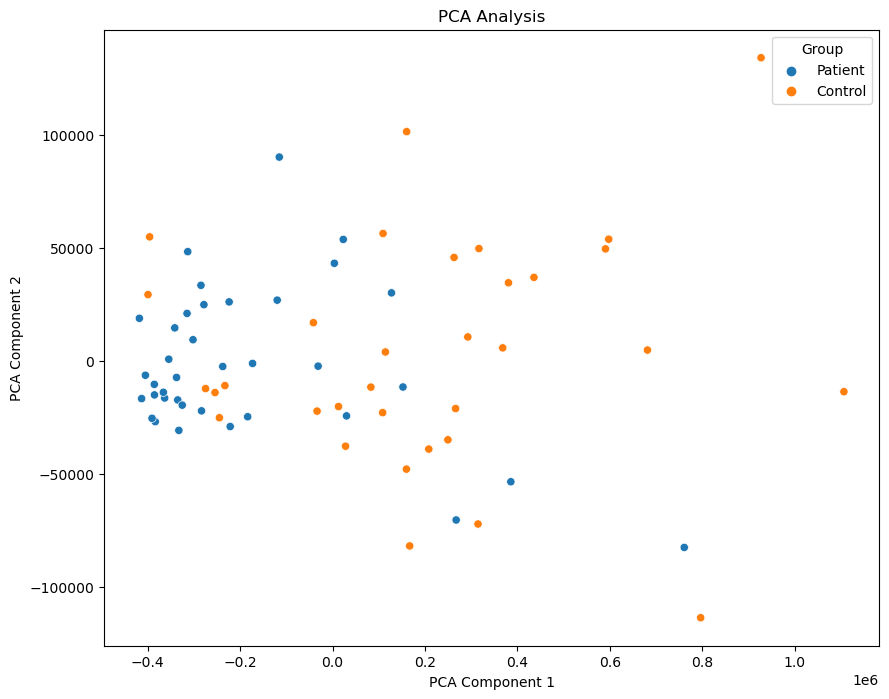

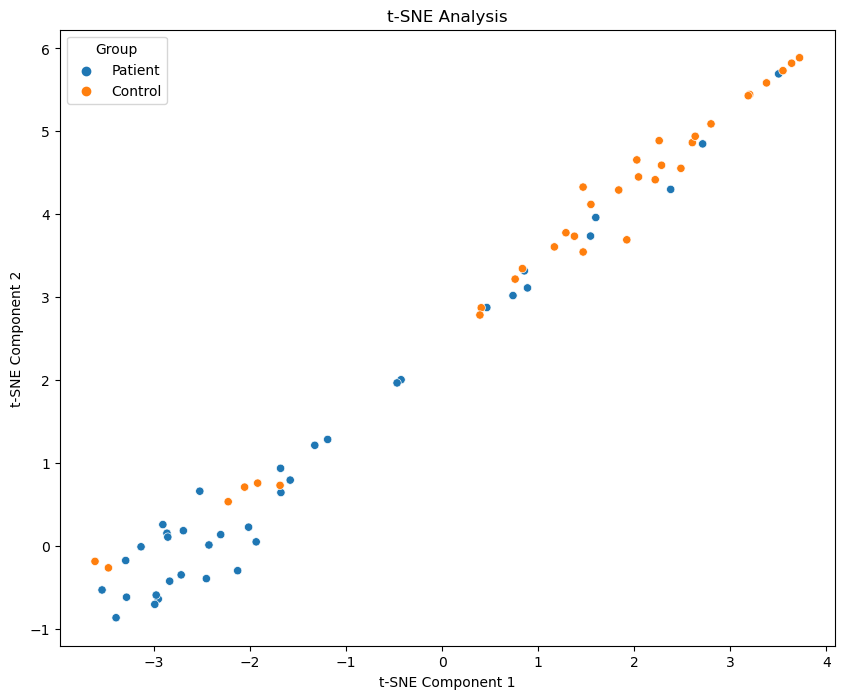

C:\ProgramData\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


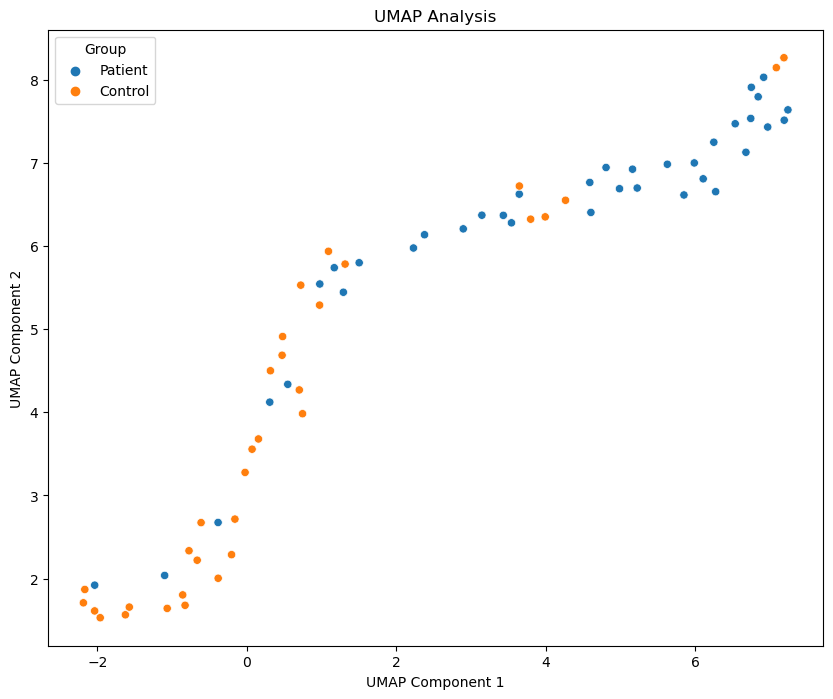

In [6]:
import pandas as pd
import gzip
import io
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Dosya yolunu belirtin
file_path = r'C:\Users\emrea\OneDrive\Masaüstü\GSE118038_miRNA_count_normalized_counts_DESeq2_all_samples (2).xls.gz'

# GZIP dosyasını açın ve içeriğini okuyun
with gzip.open(file_path, 'rb') as f:
    file_content = io.BytesIO(f.read())

# Excel dosyasını BytesIO nesnesinden yükleyin
data = pd.read_excel(file_content)

# Sütun adlarını ve ilk birkaç satırı görüntüleyin
print(data.columns)
print(data.head())

# P ve A sütunlarını seçin
p_columns = [col for col in data.columns if col.startswith('P')]
a_columns = [col for col in data.columns if col.startswith('A')]

# PCA, t-SNE ve UMAP Analizi için P ve A sütunlarını seçin
features = data[p_columns + a_columns]

# Hasta ve kontrol gruplarını etiketleyin
groups = ['Patient'] * len(p_columns) + ['Control'] * len(a_columns)

# PCA Analizi
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features.T)  # Transpoze ederek sütunları örnek olarak kullanıyoruz
data_pca = pd.DataFrame(pca_result, columns=['pca1', 'pca2'])
data_pca['group'] = groups

# PCA Sonuçlarını Görselleştirme
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca1', y='pca2', hue='group', data=data_pca)
plt.title('PCA Analysis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Group')
plt.show()

# t-SNE Analizi
tsne = TSNE(n_components=2, random_state=42, n_iter=1000, perplexity=30)
tsne_result = tsne.fit_transform(features.T)  # Transpoze ederek sütunları örnek olarak kullanıyoruz
data_tsne = pd.DataFrame(tsne_result, columns=['tsne1', 'tsne2'])
data_tsne['group'] = groups

# t-SNE Sonuçlarını Görselleştirme
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne1', y='tsne2', hue='group', data=data_tsne)
plt.title('t-SNE Analysis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Group')
plt.show()

# UMAP Analizi
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(features.T)  # Transpoze ederek sütunları örnek olarak kullanıyoruz
data_umap = pd.DataFrame(umap_result, columns=['umap1', 'umap2'])
data_umap['group'] = groups

# UMAP Sonuçlarını Görselleştirme
plt.figure(figsize=(10, 8))
sns.scatterplot(x='umap1', y='umap2', hue='group', data=data_umap)
plt.title('UMAP Analysis')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Group')
plt.show()


In [7]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, brier_score_loss
from sklearn.preprocessing import StandardScaler

# Veriyi yükleme
file_path = r'C:\Users\emrea\OneDrive\Masaüstü\GSE118038_miRNA_count_normalized_counts_DESeq2_all_samples (2).xls.gz'

# GZIP dosyasını açın ve içeriğini okuyun
import gzip
import io

with gzip.open(file_path, 'rb') as f:
    file_content = io.BytesIO(f.read())

# Excel dosyasını BytesIO nesnesinden yükleyin
data = pd.read_excel(file_content, engine='xlrd')

# Hasta ve kontrol gruplarını etiketleme
p_columns = [col for col in data.columns if col.startswith('P')]
a_columns = [col for col in data.columns if col.startswith('A')]
features = data[p_columns + a_columns].T
groups = ['Patient'] * len(p_columns) + ['Control'] * len(a_columns)

# Veriyi hazırlama
X = features.values
y = np.array([1 if group == 'Patient' else 0 for group in groups])

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi standartlaştırma
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Algoritmaları tanımlama
models = {
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "KNeighbors": KNeighborsClassifier(),
    "SVC": SVC(probability=True),
    "GaussianNB": GaussianNB(),
    "LogisticRegression": LogisticRegression()
}

# Modelleri eğitim ve değerlendirme
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    results[name] = {
        "Train Accuracy": accuracy_score(y_train, y_pred_train),
        "Test Accuracy": accuracy_score(y_test, y_pred_test),
        "Precision": precision_score(y_test, y_pred_test),
        "Recall": recall_score(y_test, y_pred_test),
        "F1-score": f1_score(y_test, y_pred_test),
        "Brier Score": brier_score_loss(y_test, model.predict_proba(X_test)[:, 1]),
        "AUC": roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    }

# Sonuçları yazdırma
for name, metrics in results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print()


Model: RandomForest
Train Accuracy: 1.0000
Test Accuracy: 0.5714
Precision: 0.8333
Recall: 0.5000
F1-score: 0.6250
Brier Score: 0.1922
AUC: 0.8625

Model: XGBoost
Train Accuracy: 1.0000
Test Accuracy: 0.5714
Precision: 0.8333
Recall: 0.5000
F1-score: 0.6250
Brier Score: 0.2828
AUC: 0.8500

Model: DecisionTree
Train Accuracy: 1.0000
Test Accuracy: 0.5714
Precision: 0.8333
Recall: 0.5000
F1-score: 0.6250
Brier Score: 0.4286
AUC: 0.6250

Model: KNeighbors
Train Accuracy: 0.6250
Test Accuracy: 0.6429
Precision: 0.7273
Recall: 0.8000
F1-score: 0.7619
Brier Score: 0.2486
AUC: 0.4000

Model: SVC
Train Accuracy: 1.0000
Test Accuracy: 0.5000
Precision: 1.0000
Recall: 0.3000
F1-score: 0.4615
Brier Score: 0.3871
AUC: 0.5750

Model: GaussianNB
Train Accuracy: 1.0000
Test Accuracy: 0.5714
Precision: 0.7500
Recall: 0.6000
F1-score: 0.6667
Brier Score: 0.4286
AUC: 0.5500

Model: LogisticRegression
Train Accuracy: 1.0000
Test Accuracy: 0.7857
Precision: 1.0000
Recall: 0.7000
F1-score: 0.8235
Brier Sco

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


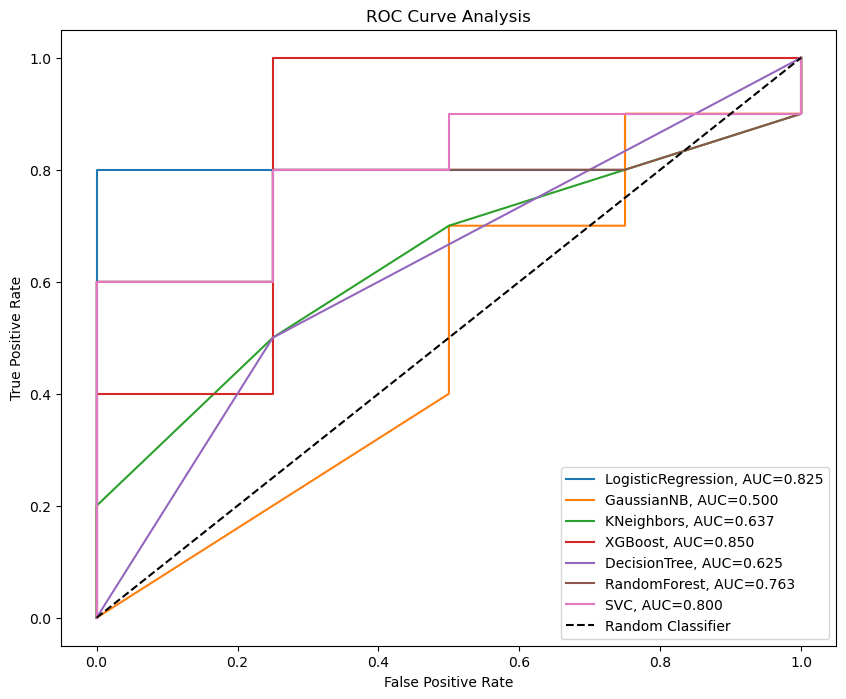

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Veriyi yükleme
file_path = r'C:\Users\emrea\OneDrive\Masaüstü\GSE118038_miRNA_count_normalized_counts_DESeq2_all_samples (2).xls.gz'

# GZIP dosyasını açın ve içeriğini okuyun
import gzip
import io

with gzip.open(file_path, 'rb') as f:
    file_content = io.BytesIO(f.read())

# Excel dosyasını BytesIO nesnesinden yükleyin
data = pd.read_excel(file_content, engine='xlrd')

# Hasta ve kontrol gruplarını etiketleme
p_columns = [col for col in data.columns if col.startswith('P')]
a_columns = [col for col in data.columns if col.startswith('A')]
features = data[p_columns + a_columns].T
groups = ['Patient'] * len(p_columns) + ['Control'] * len(a_columns)

# Veriyi hazırlama
X = features.values
y = np.array([1 if group == 'Patient' else 0 for group in groups])

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Algoritmaları tanımlama
models = {
    "LogisticRegression": LogisticRegression(),
    "GaussianNB": GaussianNB(),
    "KNeighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "SVC": SVC(probability=True)
}

# ROC eğrilerini çizme
plt.figure(figsize=(10, 8))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    plt.plot(fpr, tpr, label=f'{name}, AUC={auc:.3f}')

# Rastgele sınıflandırma için referans çizgisi
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Analysis')
plt.legend(loc='lower right')
plt.show()


In [10]:
!pip install shap


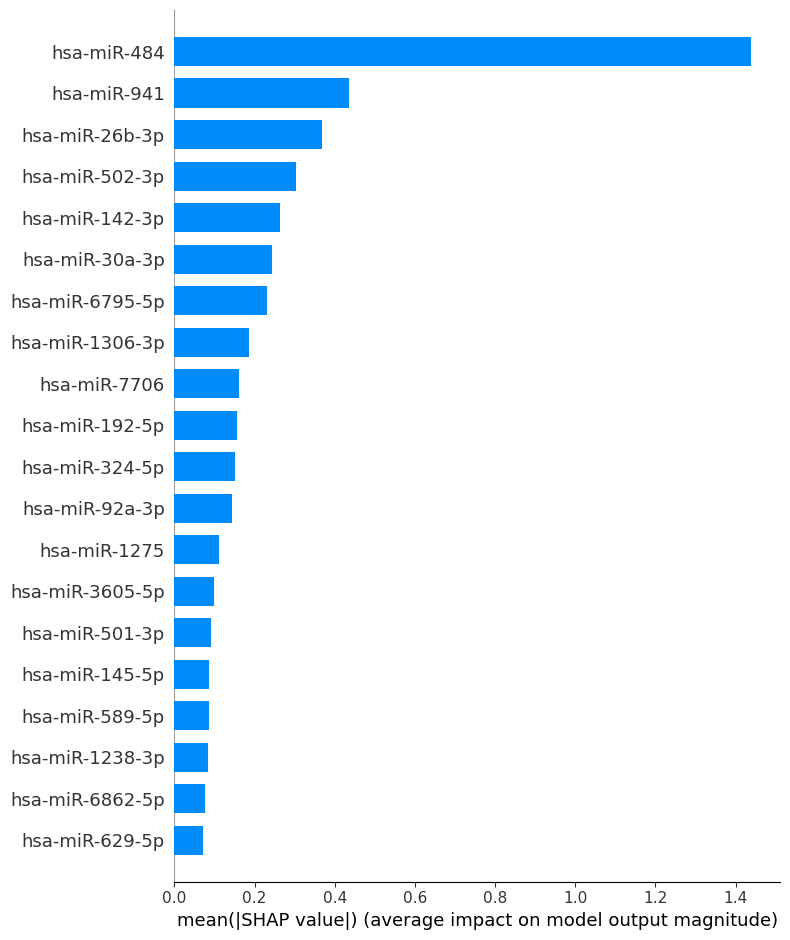

In [32]:
import shap

# SHAP analizi
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Doğru özellik isimlerini kullanarak özet grafiği çizme
feature_names = data['miRNA'].values
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="bar")


In [12]:

!pip install lime


In [34]:
import lime
import lime.lime_tabular

# LIME explainer oluşturma, y ekseninde gen, miRNA veya nükleotid isimlerini kullanma
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=feature_names, class_names=['Control', 'Patient'], discretize_continuous=True)

# Bir örneği açıklama
i = 0
exp = explainer.explain_instance(X_test[i], models['RandomForest'].predict_proba, num_features=10)
exp.show_in_notebook(show_table=True, show_all=False)


In [20]:

!pip install anchor-exp

In [48]:
import shap
import pandas as pd
import xgboost as xgb
import numpy as np

# SHAP analizi
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Doğru özellik isimlerini kullanarak özet grafiği çizme
feature_names = data['miRNA'].values

# SHAP değerlerinin ortalama mutlak değerini alarak özellik önemini hesapla
importance_df = pd.DataFrame(list(zip(feature_names, np.mean(np.abs(shap_values), axis=0))), columns=['miRNA', 'importance'])
importance_df = importance_df.sort_values(by='importance', ascending=False)

# İlk 20 miRNA'yı seçme
top_20_miRNAs = importance_df.head(20)

# İlk 20 miRNA'yı görüntüleme
print("Top 20 miRNA Importance:")
print(top_20_miRNAs)


Top 20 miRNA Importance:
                miRNA  importance
9         hsa-miR-484    1.438721
779       hsa-miR-941    0.436012
138    hsa-miR-26b-3p    0.366807
1296   hsa-miR-502-3p    0.304225
983    hsa-miR-142-3p    0.264127
1157   hsa-miR-30a-3p    0.243904
863   hsa-miR-6795-5p    0.230022
822   hsa-miR-1306-3p    0.184899
1392     hsa-miR-7706    0.161589
1591   hsa-miR-192-5p    0.154834
1257   hsa-miR-324-5p    0.151540
1207   hsa-miR-92a-3p    0.144341
893      hsa-miR-1275    0.111421
1508  hsa-miR-3605-5p    0.098161
823    hsa-miR-501-3p    0.090771
740    hsa-miR-145-5p    0.086425
148    hsa-miR-589-5p    0.085560
546   hsa-miR-1238-3p    0.083518
594   hsa-miR-6862-5p    0.074988
18     hsa-miR-629-5p    0.072125


In [60]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from anchor import anchor_tabular

# Veriyi hazırlama
# X ve y'nin zaten yüklü olduğunu varsayıyoruz
# X_train, X_test, y_train, y_test'ı yeniden ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellik Seçimi Kullanarak Veri Kümesini Küçültme
selector = SelectKBest(f_classif, k=20)  # Daha küçük bir k kullanarak bellek kullanımını azaltma
X_train_reduced = selector.fit_transform(X_train, y_train)
X_test_reduced = selector.transform(X_test)

# Modeli yeni özellikler üzerinde eğitme
model = RandomForestClassifier()
model.fit(X_train_reduced, y_train)

# Özellik isimlerini güncelleme
selected_features = selector.get_support(indices=True)
feature_names = data['miRNA'].values[selected_features]

# Anchor explainer oluşturma
anchor_explainer = anchor_tabular.AnchorTabularExplainer(
    class_names=['Control', 'Patient'], 
    feature_names=feature_names, 
    train_data=X_train_reduced
)

# Bir örneği açıklama
i = 0
anchor_exp = anchor_explainer.explain_instance(X_test_reduced[i], model.predict, threshold=0.95, batch_size=10)
print("Anchor Names: ", anchor_exp.names())
print("Precision: ", anchor_exp.precision())
print("Coverage: ", anchor_exp.coverage())


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   3    6   10   12   15   32   36   58   87   92   96  111  125  132
  147  154  159  185  188  196  250  254  297  302  318  320  346  359
  360  372  375  382  383  387  389  407  420  426  431  441  444  445
  451  453  463  466  476  484  509  512  532  536  540  554  557  579
  582  598  602  614  617  625  630  664  685  691  693  712  725  735
  741  744  763  766  769  783  794  811  816  831  833  837  847  862
  884  908  938  941  943  963  964  965  972  987 1021 1024 1028 1037
 1052 1056 1058 1092 1107 1115 1116 1118 1125 1133 1134 1167 1168 1196
 1199 1221 1234 1253 1260 1278 1295 1306 1315 1357 1362 1376 1381 1409
 1426 1434 1436 1441 1444 1456 1457 1462 1468 1496 1504 1514 1515 1546
 1549 1551 1562 1574 1576 1583 1587 1589 1592 1612 1621 1631 1650 1651
 1653] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarn

Anchor Names:  ['hsa-miR-484 <= 112.59', 'hsa-miR-941 <= 12.97']
Precision:  1.0
Coverage:  0.2168


In [11]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import gzip
import io

# Dosya yolu
file_path = r'C:\\Users\\MasterYtu\\Desktop\\GSE118038_miRNA_count_normalized_counts_DESeq2_all_samples.xls.gz'

# GZIP dosyasını açma ve okuma
with gzip.open(file_path, 'rb') as f:
    file_content = io.BytesIO(f.read())

# Excel dosyasını BytesIO nesnesinden yükleme
data = pd.read_excel(file_content, engine='xlrd')

# Hasta ve kontrol gruplarını etiketleme
p_columns = [col for col in data.columns if col.startswith('P')]
a_columns = [col for col in data.columns if col.startswith('A')]

# Hasta ve kontrol gruplarını ayırma
patient_data = data[p_columns]
control_data = data[a_columns]

# Diferansiyel Ekspresyon Analizi
deg_results = []

for miRNA in data.index:
    patient_values = patient_data.loc[miRNA].values
    control_values = control_data.loc[miRNA].values
    
    # t-testi
    t_stat, p_value = ttest_ind(patient_values, control_values)
    
    deg_results.append({
        'miRNA': miRNA,
        't_stat': t_stat,
        'p_value': p_value,
        'mean_patient': np.mean(patient_values),
        'mean_control': np.mean(control_values)
    })

# Sonuçları DataFrame olarak oluşturma
deg_results_df = pd.DataFrame(deg_results)

# p-değerine göre sıralama
deg_results_df = deg_results_df.sort_values(by='p_value')

# Önemli miRNA'ları belirleme (örneğin, p-değeri < 0.05)
significant_miRNAs = deg_results_df[deg_results_df['p_value'] < 0.05]

# Sonuçları görüntüleme
print("Diferansiyel Ekspresyon Analizi Sonuçları:")
print(deg_results_df.head(20))

print("\nÖnemli miRNA'lar (p < 0.05):")
print(significant_miRNAs)

# Sonuçları kaydetme
deg_results_df.to_csv('differential_expression_results.csv', index=False)

Diferansiyel Ekspresyon Analizi Sonuçları:
      miRNA    t_stat       p_value   mean_patient   mean_control
1039   1039 -6.344935  2.101839e-08      54.941869     182.084572
1050   1050 -6.045226  7.087176e-08     325.788706    1000.213062
779     779 -5.810320  1.818275e-07      49.275572     158.793379
1323   1323 -5.784378  2.016374e-07       8.389190      27.001648
1245   1245 -5.461561  7.215922e-07     123.917185     288.725120
1173   1173 -5.295684  1.376342e-06     164.702409     581.405473
1019   1019 -5.274681  1.492852e-06  254026.502139  644534.595669
983     983  5.203441  1.964911e-06     249.585461     111.287488
1596   1596 -5.197911  2.007155e-06     118.739244     532.474304
468     468 -5.150402  2.408755e-06     284.574373     720.590993
148     148 -5.041660  3.648022e-06      31.635171      62.264165
1604   1604 -5.006587  4.167546e-06      68.683244     183.125229
530     530 -4.858133  7.291633e-06      14.645000      39.751923
932     932 -4.712937  1.251629e-

C:\Users\MasterYtu\AppData\Local\Temp\ipykernel_9568\1944559730.py:39: RuntimeWarning: divide by zero encountered in log2
  log2_fc = np.log2(np.mean(patient_values) / np.mean(control_values))
C:\Users\MasterYtu\AppData\Local\Temp\ipykernel_9568\1944559730.py:39: RuntimeWarning: invalid value encountered in double_scalars
  log2_fc = np.log2(np.mean(patient_values) / np.mean(control_values))
C:\Users\MasterYtu\AppData\Local\Temp\ipykernel_9568\1944559730.py:39: RuntimeWarning: divide by zero encountered in double_scalars
  log2_fc = np.log2(np.mean(patient_values) / np.mean(control_values))


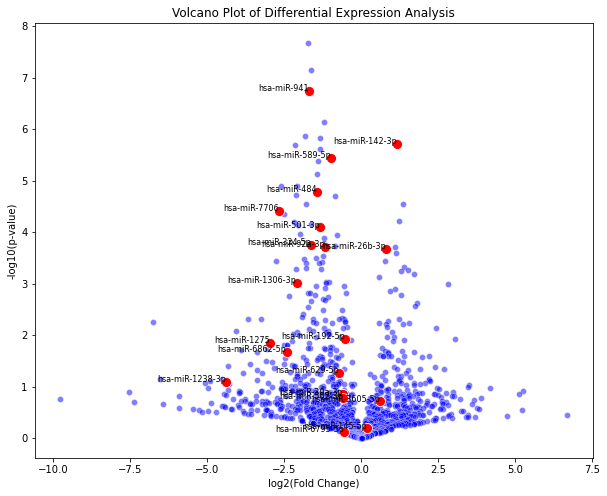

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import gzip
import io
import matplotlib.pyplot as plt
import seaborn as sns

# 
file_path = r'C:\\Users\\MasterYtu\\Desktop\\GSE118038_miRNA_count_normalized_counts_DESeq2_all_samples.xls.gz'

# 
with gzip.open(file_path, 'rb') as f:
    file_content = io.BytesIO(f.read())

# 
data = pd.read_excel(file_content, engine='xlrd')

# 
data.set_index('miRNA', inplace=True)

# 
p_columns = [col for col in data.columns if col.startswith('P')]
a_columns = [col for col in data.columns if col.startswith('A')]

# 
patient_data = data[p_columns]
control_data = data[a_columns]

# 
deg_results = []

for miRNA in data.index:
    patient_values = patient_data.loc[miRNA].values
    control_values = control_data.loc[miRNA].values
    
    # t-testi
    t_stat, p_value = ttest_ind(patient_values, control_values)
    log2_fc = np.log2(np.mean(patient_values) / np.mean(control_values))
    
    deg_results.append({
        'miRNA': miRNA,
        't_stat': t_stat,
        'p_value': p_value,
        'log2_fc': log2_fc,
        'mean_patient': np.mean(patient_values),
        'mean_control': np.mean(control_values)
    })

# Sonuçları DataFrame 
deg_results_df = pd.DataFrame(deg_results)

# p-değerine göre sıralama
deg_results_df = deg_results_df.sort_values(by='p_value')

# Volcano plot için -log10(p-value) hesaplama
deg_results_df['-log10(p_value)'] = -np.log10(deg_results_df['p_value'])

# Seçili miRNA'lar
selected_mirnas = [
    'hsa-miR-484', 'hsa-miR-26b-3p', 'hsa-miR-142-3p', 'hsa-miR-6795-5p', 'hsa-miR-7706',
    'hsa-miR-324-5p', 'hsa-miR-1275', 'hsa-miR-501-3p', 'hsa-miR-589-5p', 'hsa-miR-6862-5p',
    'hsa-miR-941', 'hsa-miR-502-3p', 'hsa-miR-30a-3p', 'hsa-miR-1306-3p', 'hsa-miR-192-5p',
    'hsa-miR-92a-3p', 'hsa-miR-3605-5p', 'hsa-miR-145-5p', 'hsa-miR-1238-3p', 'hsa-miR-629-5p'
]

# Volcano plot çizimi
plt.figure(figsize=(10, 8))

# Tüm miRNA'lar için scatter plot
sns.scatterplot(data=deg_results_df, x='log2_fc', y='-log10(p_value)', color='blue', alpha=0.5)

# Seçili miRNA'lar için scatter plot
selected_df = deg_results_df[deg_results_df['miRNA'].isin(selected_mirnas)]
sns.scatterplot(data=selected_df, x='log2_fc', y='-log10(p_value)', color='red', s=100)

# Seçili miRNA'ları etiketleme
for i in range(selected_df.shape[0]):
    plt.text(selected_df['log2_fc'].iloc[i], selected_df['-log10(p_value)'].iloc[i], selected_df['miRNA'].iloc[i], fontsize=8, color='black', ha='right')

plt.xlabel('log2(Fold Change)')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot of Differential Expression Analysis')
plt.show()

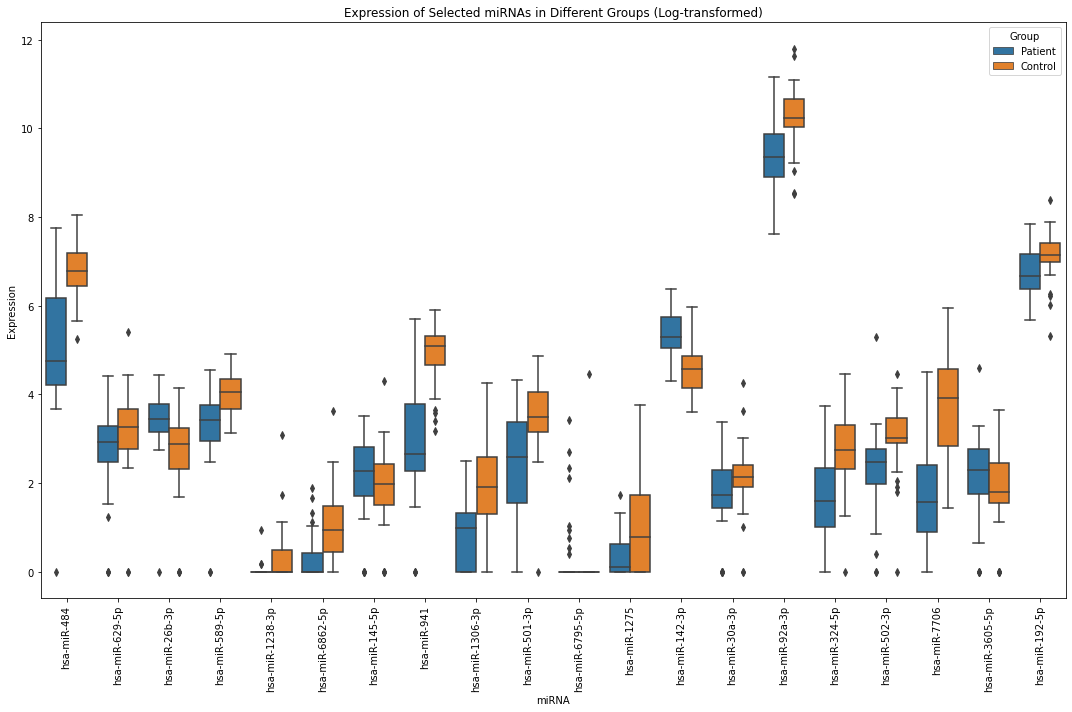

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gzip
import io
import numpy as np

# Dosya yolunu belirtin
file_path = r'C:\\Users\\MasterYtu\\Desktop\\GSE118038_miRNA_count_normalized_counts_DESeq2_all_samples.xls.gz'

# GZIP dosyasını açın ve içeriğini okuyun
with gzip.open(file_path, 'rb') as f:
    file_content = io.BytesIO(f.read())

# Excel dosyasını BytesIO nesnesinden yükleyin
data = pd.read_excel(file_content)

# Seçili miRNA'lar
selected_mirnas = [
    'hsa-miR-484', 'hsa-miR-26b-3p', 'hsa-miR-142-3p', 'hsa-miR-6795-5p', 'hsa-miR-7706',
    'hsa-miR-324-5p', 'hsa-miR-1275', 'hsa-miR-501-3p', 'hsa-miR-589-5p', 'hsa-miR-6862-5p',
    'hsa-miR-941', 'hsa-miR-502-3p', 'hsa-miR-30a-3p', 'hsa-miR-1306-3p', 'hsa-miR-192-5p',
    'hsa-miR-92a-3p', 'hsa-miR-3605-5p', 'hsa-miR-145-5p', 'hsa-miR-1238-3p', 'hsa-miR-629-5p'
]

# Dataframe oluşturma
selected_data = data[data['miRNA'].isin(selected_mirnas)]
selected_data = selected_data.melt(id_vars=['miRNA'], var_name='Sample', value_name='Expression')

# Log transform uygulama
selected_data['Expression'] = np.log1p(selected_data['Expression'])

# Grupları etiketleme
selected_data['Group'] = selected_data['Sample'].apply(lambda x: 'Control' if x.startswith('A') else 'Patient')

# Boxplot oluşturma
plt.figure(figsize=(15, 10))
sns.boxplot(x='miRNA', y='Expression', hue='Group', data=selected_data)
plt.title('Expression of Selected miRNAs in Different Groups (Log-transformed)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
import lime
import lime.lime_tabular

# LIME explainer oluşturma, y ekseninde gen, miRNA veya nükleotid isimlerini kullanma
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=feature_names, class_names=['Control', 'Patient'], discretize_continuous=True)

# Bir örneği açıklama
i = 0
exp = explainer.explain_instance(X_test[i], models['RandomForest'].predict_proba, num_features=10)
exp.show_in_notebook(show_table=True, show_all=False)

![](lime-output.png)